# Classifying Article Topics using Keras

Topic classification is a common task for machine learning. Here, we apply deep neural networks to the well-known [Reuters dataset](https://keras.io/datasets/#reuters-newswire-topics-classification).

This example is taken from [*Deep Learning with Python*](https://github.com/fchollet/deep-learning-with-python-notebooks), F. Chollet, 2018, Section 3.5. 

In [4]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
word_index = reuters.get_word_index()

The Reuters dataset is a textual dataset of news articles written on 46 topics. The articles are lists of word indexes.

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_newswire(i):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])

print(
    f'training set \
        \n\tcount: {len(train_data)} \
        \n\tshape: {train_data.shape} \
        \n\timage data type: {train_data.dtype} \
        \n\tlabel data type: {train_labels.dtype}\n',
    f'testing set \
        \n\tcount: {len(test_labels)} \
        \n\tshape: {test_data.shape}\n',
    f'example \
        \n\tarticle values: {test_data[0]} \
        \n\tarticle words: {decode_newswire(0)} \
        \n\tarticle topic: {test_labels[0]}'
)

training set         
	count: 8982         
	shape: (8982,)         
	image data type: object         
	label data type: int64
 testing set         
	count: 2246         
	shape: (2246,)
 example         
	article values: [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]         
	article words: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up

We process the data for use in the network by one-hot encoding the articles and the labels.

In [7]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    """This function creates a multi-hot representation of each word sequence.
    """
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Set results[i] to 1 for all word indexes in sequence.
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

print(
      f'one-hot vectorized: \
          \n\tarticle: {x_train[0]} \
          \n\tlabel: {y_train_labels[0]}'
)



one-hot vectorized:           
	article: [0. 1. 1. ... 0. 0. 0.]           
	label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We also partition out a validation dataset.

In [49]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train_labels[:1000]
partial_y_train = y_train_labels[1000:]

We now build a three-layer network.

In [66]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We now train the model using separate training and validation datasets.

In [67]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test, y_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 126us/step - loss: 2.6754 - acc: 0.4841 - val_loss: 1.7588 - val_acc: 0.6130
Epoch 2/10
7982/7982 [==============================] - 1s 87us/step - loss: 1.4554 - acc: 0.6844 - val_loss: 1.3422 - val_acc: 0.7080
Epoch 3/10
7982/7982 [==============================] - 1s 92us/step - loss: 1.0867 - acc: 0.7694 - val_loss: 1.1727 - val_acc: 0.7330
Epoch 4/10
7982/7982 [==============================] - 1s 88us/step - loss: 0.8493 - acc: 0.8136 - val_loss: 1.0591 - val_acc: 0.7640
Epoch 5/10
7982/7982 [==============================] - 1s 86us/step - loss: 0.6690 - acc: 0.8587 - val_loss: 0.9900 - val_acc: 0.7880
Epoch 6/10
7982/7982 [==============================] - 1s 86us/step - loss: 0.5302 - acc: 0.8886 - val_loss: 0.9398 - val_acc: 0.8050
Epoch 7/10
7982/7982 [==============================] - 1s 87us/step - loss: 0.4242 - acc: 0.9107 - val_loss: 0.9555 - val_acc: 0.7950
Epoch 

[0.9909474231893212, 0.7858414960194143]

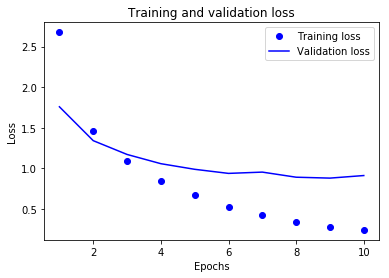

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Try larger hidden layers, which is a bit better but much slower.

In [71]:
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))

model.evaluate(x_test, y_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 8s 990us/step - loss: 1.9848 - acc: 0.5540 - val_loss: 1.2045 - val_acc: 0.7110
Epoch 2/10
7982/7982 [==============================] - 7s 909us/step - loss: 0.8276 - acc: 0.8066 - val_loss: 0.8821 - val_acc: 0.8120
Epoch 3/10
7982/7982 [==============================] - 7s 895us/step - loss: 0.4111 - acc: 0.9053 - val_loss: 0.8498 - val_acc: 0.8120
Epoch 4/10
7982/7982 [==============================] - 7s 904us/step - loss: 0.2223 - acc: 0.9463 - val_loss: 0.9099 - val_acc: 0.8130
Epoch 5/10
7982/7982 [==============================] - 7s 934us/step - loss: 0.2890 - acc: 0.9258 - val_loss: 0.8771 - val_acc: 0.8250
Epoch 6/10
7982/7982 [==============================] - 8s 1ms/step - loss: 0.1420 - acc: 0.9543 - val_loss: 0.8841 - val_acc: 0.8170
Epoch 7/10
7982/7982 [==============================] - 8s 1ms/step - loss: 0.1279 - acc: 0.9548 - val_loss: 0.9353 - val_acc: 0.8110
Epoc

[1.2561717245691288, 0.7920747996968874]

Try a model with a smaller hidden layer, which effectively creates an information bottleneck.

In [70]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

model.evaluate(x_test, y_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 137us/step - loss: 3.3505 - acc: 0.2086 - val_loss: 2.9147 - val_acc: 0.4350
Epoch 2/20
7982/7982 [==============================] - 1s 85us/step - loss: 2.5752 - acc: 0.5757 - val_loss: 2.3168 - val_acc: 0.6260
Epoch 3/20
7982/7982 [==============================] - 1s 71us/step - loss: 1.9959 - acc: 0.6582 - val_loss: 1.8644 - val_acc: 0.6470
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 1.5839 - acc: 0.6974 - val_loss: 1.5959 - val_acc: 0.6800
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.3246 - acc: 0.7197 - val_loss: 1.4409 - val_acc: 0.6960
Epoch 6/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.1596 - acc: 0.7397 - val_loss: 1.3660 - val_acc: 0.7000
Epoch 7/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.0399 - acc: 0.7603 - val_loss: 1.3124 - val_acc: 0.7000
Epoch 

[1.326304891761243, 0.7355298308103295]